# LBF10x10-n2-f7-static-v2 Experiment Analysis 

In [1]:
import copy
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents

import baposgmcp.plot as plot_utils
import baposgmcp.plot.paper as paper_utils
from baposgmcp.config import BASE_REPO_DIR

algname = "POTMMCP"
baselinealgname = "I-POMCP-PF"

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, 
    "experiments", 
    "LBF10x10-n2-f7-static-v2", 
    "results", 
    "experiment_results.csv"
)
figure_dir = osp.join(BASE_REPO_DIR, "experiments", "LBF10x10-n2-f7-static-v2", "figures")
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "lbf10x10_n2_f7_static_v2", "results", "heuristic_pairwise_results.csv"
)

## Define Co-Player Prior

In [2]:
policy_prior = {1: {
    "heuristic1-v0": 1/4,
    "heuristic2-v0": 1/4,
    "heuristic3-v0": 1/4,
    "heuristic4-v0": 1/4
}}
coplayer_policy_ids = list(policy_prior[1])
print(coplayer_policy_ids)

['heuristic1-v0', 'heuristic2-v0', 'heuristic3-v0', 'heuristic4-v0']


# The environment 

## Problem size

- Grid size = 10 x 10
- Num food = 7
- Max agent level = 3
- Max food level = 6

**States**

```
= pos_0 * pos_1 * lvl_0 * lvl_1 * max_food_lvl**num_food x food_eaten**num_food 
= (100-7)*(99-7)*(3*3)*(6**7)*(2**7) 
= 2,759,192,543,232
```

**Actions** = 6 (Do nothing, N, S, W, E, Load)

**Observations** = 2 cells in each direction = 5x5

/home/jonathon/miniconda3/envs/ba-posgmcp/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


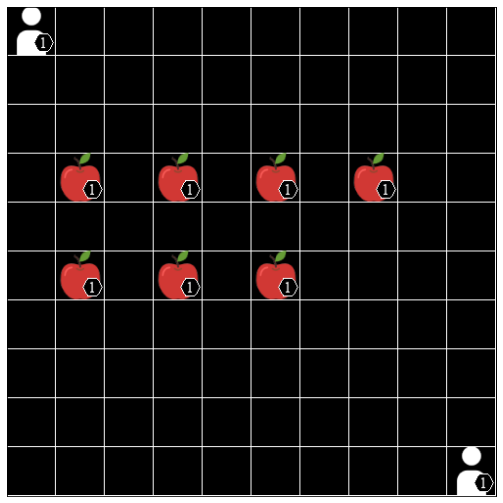

In [3]:
fig, ax = plot_utils.plot_environment("LBF10x10-n2-f7-static-v2", (9, 9))
fig.savefig(osp.join(figure_dir, "env.png"))
plt.show()

## Loading Heuristic Policy Data

In [4]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)

fixed_policy_ids = policy_df["policy_id"].unique().tolist()
fixed_policy_ids.sort()
print("Policies")
print("--------")
for pi_id in fixed_policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in policy_df.columns:
    print("  ", c)

Policies
--------
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0

Columns
-------
   exp_id
   agent_id
   env_id
   policy_id
   exp_seed
   num_episodes
   time_limit
   episode_return_mean
   episode_return_std
   episode_return_max
   episode_return_min
   episode_steps_mean
   episode_steps_std
   episode_time_mean
   episode_time_std
   num_episode_done
   num_LOSS
   num_DRAW
   num_WIN
   num_NA
   episode_return_CI
   episode_steps_CI
   episode_time_CI
   prop_LOSS
   prop_DRAW
   prop_WIN
   prop_NA
   num_sims
   truncated
   coplayer_policy_id


### Heuristic policies pairwise performance

This is what was used to generate the meta-policies.

/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]
/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]


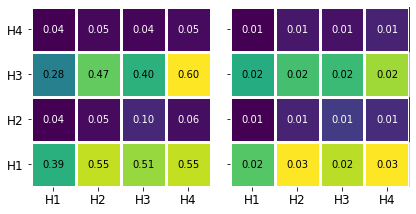

In [5]:
fig, axs = plot_utils.plot_pairwise_comparison(
    policy_df,
    y_key="episode_return_mean", 
    policy_key="policy_id",
    y_err_key="episode_return_CI",
    vrange=None, 
    figsize=(6, 3), 
    valfmt="{x:.2f}",
    policies=fixed_policy_ids,
    coplayer_policies=fixed_policy_ids,
    policy_labels={
        "heuristic1-v0": "H1",
        "heuristic2-v0": "H2",
        "heuristic3-v0": "H3",
        "heuristic4-v0": "H4"
    },
    average_duplicates=True,
    duplicate_warning=False
)
fig.savefig(osp.join(figure_dir, "fixed_policy_payoff.png"))

## Loading BAPOSGMCP Data

In [6]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)

policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   baposgmcp-fixed_piheuristic1-v0_numsims1000_truncatedFalse
   baposgmcp-fixed_piheuristic1-v0_numsims100_truncatedFalse
   baposgmcp-fixed_piheuristic1-v0_numsims10_truncatedFalse
   baposgmcp-fixed_piheuristic1-v0_numsims500_truncatedFalse
   baposgmcp-fixed_piheuristic1-v0_numsims50_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims1000_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims100_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims10_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims500_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims50_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims1000_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims100_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims10_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims500_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims50_truncatedFalse
   baposgmcp-fixed_piheuristic4-v0_numsims1000_truncatedFalse
   bapos

## Combine data

In [7]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([df1, df2]).reset_index(drop=True)

def add_alg_id(row):
    pi_id = row["policy_id"]
    if pi_id.startswith("heuristic"):
        return "fixed"
    tokens = pi_id.split("_")
    alg_id = "_".join([
        t for t in tokens 
        if all(
            s not in t for s in [
                "actionselection", "numsims", "truncated", "greedy", "softmax", "uniform", "piheuristic"
            ]
        )
    ])
    return alg_id


def add_meta_pi(row):
    pi_id = row["policy_id"]
    for meta_pi in ["greedy", "softmax", "uniform"]:
        if meta_pi in pi_id:
            return meta_pi
    return "NA"


combined_df["alg_id"] = combined_df.apply(add_alg_id, axis=1)
combined_df["meta_pi"] = combined_df.apply(add_meta_pi, axis=1)
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)
    
alg_ids = combined_df["alg_id"].unique().tolist()
alg_ids.sort()
print("\nAlg IDs")
print("-------")
for n in alg_ids:
    print("  ", n)
    
print("\nMeta Pis:")
print("---------")
print(combined_df["meta_pi"].unique().tolist())

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   baposgmcp-fixed_piheuristic1-v0_numsims1000_truncatedFalse
   baposgmcp-fixed_piheuristic1-v0_numsims100_truncatedFalse
   baposgmcp-fixed_piheuristic1-v0_numsims10_truncatedFalse
   baposgmcp-fixed_piheuristic1-v0_numsims500_truncatedFalse
   baposgmcp-fixed_piheuristic1-v0_numsims50_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims1000_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims100_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims10_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims500_truncatedFalse
   baposgmcp-fixed_piheuristic2-v0_numsims50_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims1000_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims100_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims10_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims500_truncatedFalse
   baposgmcp-fixed_piheuristic3-v0_numsims50_truncatedFalse
   baposgmcp-fixed_piheuristic4-v0_numsims1000_truncatedFalse
   bapos

## Pairwise performance

Here we look at the performance of each policy against each other policy including BAPOSGMCP and baselines with different number of simulations, action selection, and meta-policies.

/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]
/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]


(<Figure size 1728x7200 with 2 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

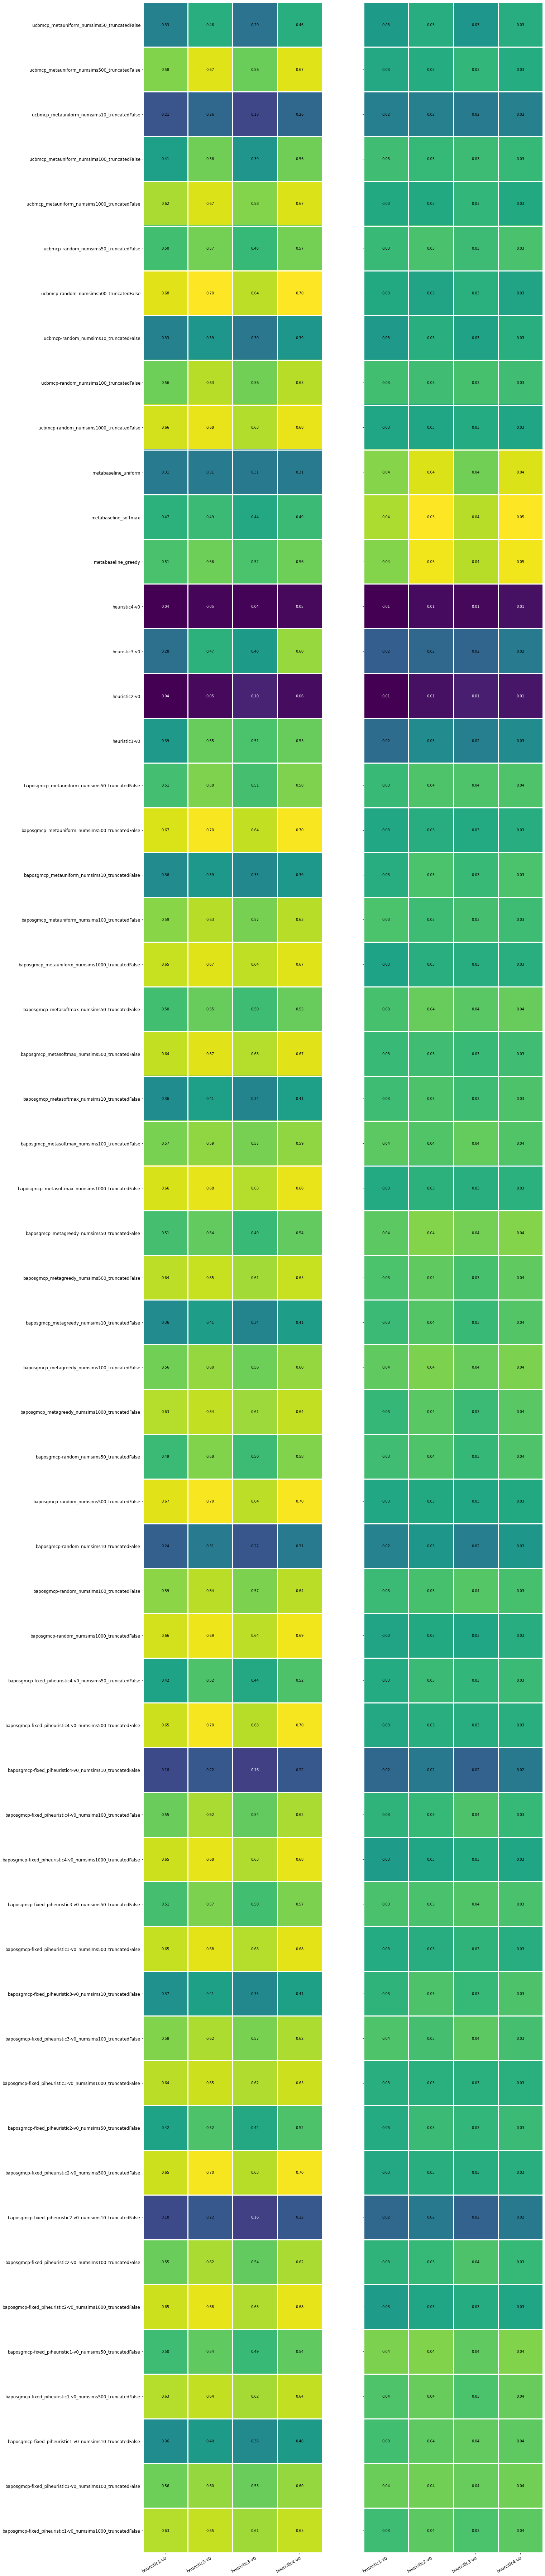

In [8]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_return_mean", 
    policy_key="policy_id",
    y_err_key="episode_return_CI",
    vrange=None, 
    figsize=(24, 100), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

/home/jonathon/code/ba-posgmcp/baposgmcp/plot/pairwise.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]


(<Figure size 1152x7200 with 1 Axes>, array([[<AxesSubplot:>]], dtype=object))

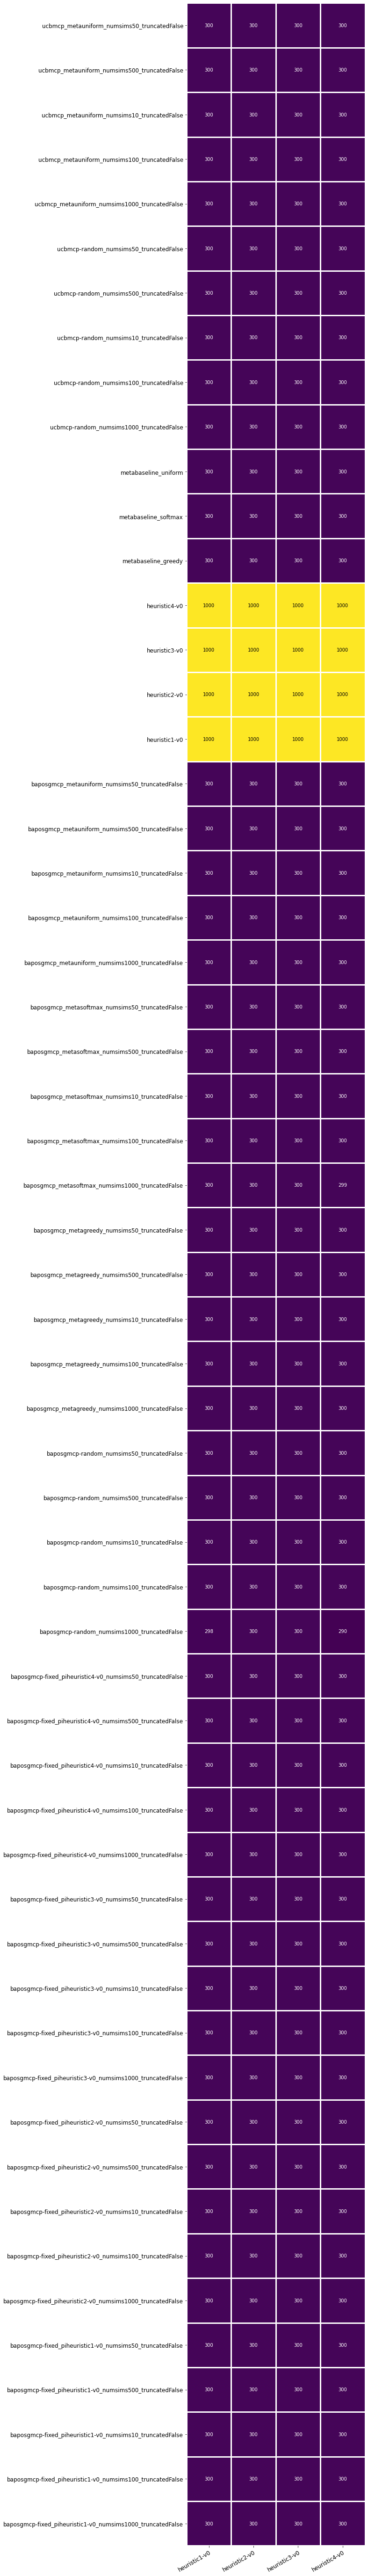

In [9]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="num_episodes", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(16, 100), 
    valfmt="{x:.0f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

# Expected Performance

Here we look at the expected performance given the policy prior of BAPOSGMCP and the different baselines.

Specifically:

1. Comparing different meta-policies
2. Comparing performance between all algorithms


In [10]:
exp_df = plot_utils.get_uniform_expected_df(
    combined_df, 
    coplayer_policies=coplayer_policy_ids,
    coplayer_policy_key="coplayer_policy_id"
)

Ungrouped size = 232
Grouped size = 57


In [11]:
# Base plot kwargs
base_plot_kwargs = paper_utils.get_base_plot_kwargs()
return_plot_kwargs = copy.deepcopy(base_plot_kwargs)
return_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Episode Return",
    # "xticks": [0, 500, 1000, 1500],
})

step_plot_kwargs = copy.deepcopy(return_plot_kwargs)
step_plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Episode Steps",
    # "xticks": [0, 500, 1000, 1500, 2000],
})

## Comparison of the different Meta-Policies

Here we look at the performance of our algorithm using the difference meta-policies.

Looking at performance with:

- untruncated search
- using PUCB

We also look at the performance of the metabaseline with the different meta-policies.


In [12]:
meta_pi_label_map = {
    "greedy": r"$\sigma^{G}$",
    "softmax": r"$\sigma^{S}$",
    "uniform": r"$\sigma^{U}$",
}

meta_pi_df = exp_df[
    (exp_df["alg_id"].isin(["baposgmcp", "metabaseline"]))
    & (exp_df["action_selection"].isin(["pucb", None]))
]

meta_alg_ids = meta_pi_df["alg_id"].unique().tolist()
meta_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in meta_alg_ids:
    print(n)
    
policy_ids = meta_pi_df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in policy_ids:
    print(n)

Alg IDs
-------
baposgmcp
metabaseline

Policy IDs
----------
baposgmcp_metagreedy_numsims1000_truncatedFalse
baposgmcp_metagreedy_numsims100_truncatedFalse
baposgmcp_metagreedy_numsims10_truncatedFalse
baposgmcp_metagreedy_numsims500_truncatedFalse
baposgmcp_metagreedy_numsims50_truncatedFalse
baposgmcp_metasoftmax_numsims1000_truncatedFalse
baposgmcp_metasoftmax_numsims100_truncatedFalse
baposgmcp_metasoftmax_numsims10_truncatedFalse
baposgmcp_metasoftmax_numsims500_truncatedFalse
baposgmcp_metasoftmax_numsims50_truncatedFalse
baposgmcp_metauniform_numsims1000_truncatedFalse
baposgmcp_metauniform_numsims100_truncatedFalse
baposgmcp_metauniform_numsims10_truncatedFalse
baposgmcp_metauniform_numsims500_truncatedFalse
baposgmcp_metauniform_numsims50_truncatedFalse
metabaseline_greedy
metabaseline_softmax
metabaseline_uniform


baposgmcp
metabaseline


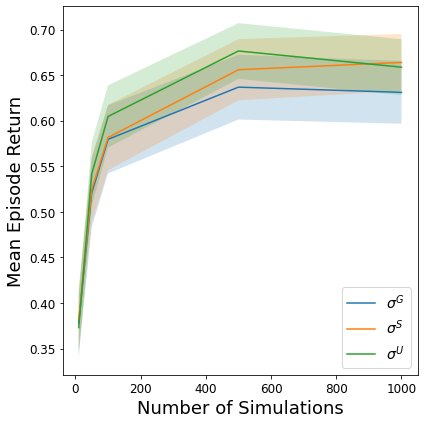

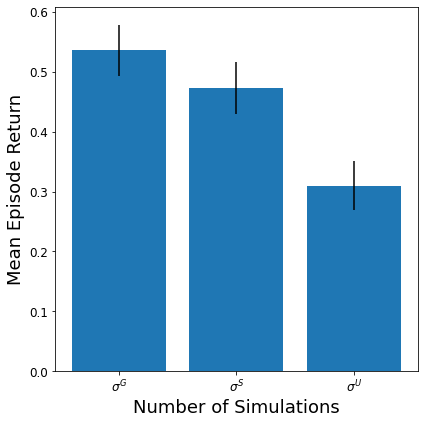

In [13]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    # "yticks": [0.3, 0.4, 0.5, 0.6, 0.7],
    # "ylim": (0.27, 0.75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": "lower right",
    # "title": "Meta-Policy" 
})

for alg_id in meta_alg_ids:
    print(alg_id)
    fig, _ = plot_utils.paper.plot_multiple_meta_policy_vs_num_sims(
        meta_pi_df[meta_pi_df["alg_id"] == alg_id],
        y_key="episode_return_mean",
        y_err_key="episode_return_CI",
        meta_pi_label_map=meta_pi_label_map,
        alg_id_key="alg_id",
        set_title=False,
        **plot_kwargs
    )
    fig.tight_layout()
    fig.savefig(osp.join(figure_dir, f"meta_pi_return_{alg_id}.png"))
    
del plot_kwargs

## Comparing Meta-Policy versus no meta-policy (using a single policy)

Here we look at the performance of BAPOSGMCP with a meta-policy against not using a meta-policy (i.e. using the different fixed policies).

Parameters:

- Untruncated search (since heuristic policies don't support truncated search)
- using PUCB


In [14]:
best_meta = "uniform"
best_meta_symbol = r"$\sigma^{U}$"
meta_vs_no_pi_label_map = {
    f"baposgmcp_meta{best_meta}": best_meta_symbol,
    "baposgmcp-random": "Random",
    "baposgmcp-fixed_piheuristic1-v0": "H1", 
    "baposgmcp-fixed_piheuristic2-v0": "H2", 
    "baposgmcp-fixed_piheuristic3-v0": "H3",
    "baposgmcp-fixed_piheuristic4-v0": "H4"
}

meta_vs_no_meta_df = exp_df[
    (exp_df["alg_id"].isin(["baposgmcp", "baposgmcp-fixed", "baposgmcp-random"]))
    & (exp_df["action_selection"].isin(["pucb"]))
    & (exp_df["meta_pi"].isin([best_meta, "NA"]))
]

meta_vs_no_meta_alg_ids = meta_vs_no_meta_df["alg_id"].unique().tolist()
meta_vs_no_meta_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in meta_vs_no_meta_alg_ids:
    print(n)
    
policy_ids = meta_vs_no_meta_df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in policy_ids:
    print(n)
    
fixed_policy_ids = meta_vs_no_meta_df["fixed_policy_id"].unique().tolist()
print("\nFixed Policy IDs")
print("----------------")
for n in fixed_policy_ids:
    print(n)

Alg IDs
-------
baposgmcp
baposgmcp-fixed
baposgmcp-random

Policy IDs
----------
baposgmcp-fixed_piheuristic1-v0_numsims1000_truncatedFalse
baposgmcp-fixed_piheuristic1-v0_numsims100_truncatedFalse
baposgmcp-fixed_piheuristic1-v0_numsims10_truncatedFalse
baposgmcp-fixed_piheuristic1-v0_numsims500_truncatedFalse
baposgmcp-fixed_piheuristic1-v0_numsims50_truncatedFalse
baposgmcp-fixed_piheuristic2-v0_numsims1000_truncatedFalse
baposgmcp-fixed_piheuristic2-v0_numsims100_truncatedFalse
baposgmcp-fixed_piheuristic2-v0_numsims10_truncatedFalse
baposgmcp-fixed_piheuristic2-v0_numsims500_truncatedFalse
baposgmcp-fixed_piheuristic2-v0_numsims50_truncatedFalse
baposgmcp-fixed_piheuristic3-v0_numsims1000_truncatedFalse
baposgmcp-fixed_piheuristic3-v0_numsims100_truncatedFalse
baposgmcp-fixed_piheuristic3-v0_numsims10_truncatedFalse
baposgmcp-fixed_piheuristic3-v0_numsims500_truncatedFalse
baposgmcp-fixed_piheuristic3-v0_numsims50_truncatedFalse
baposgmcp-fixed_piheuristic4-v0_numsims1000_truncat

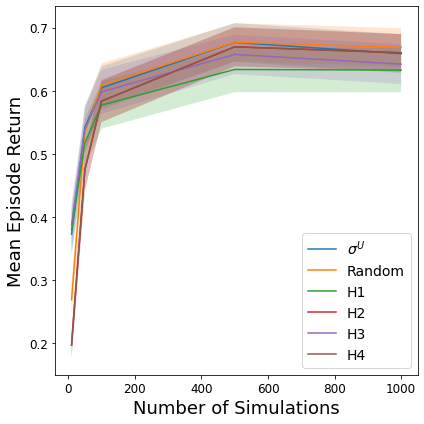

In [15]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "yticks": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    # "ylim": (0.15, 0.75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": "lower right",
    # "title": "Policy" 
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    meta_vs_no_meta_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_prefixes=[list(meta_vs_no_pi_label_map)],
    pi_label_map=meta_vs_no_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, f"meta_vs_fixed_return.png"))
    
del plot_kwargs

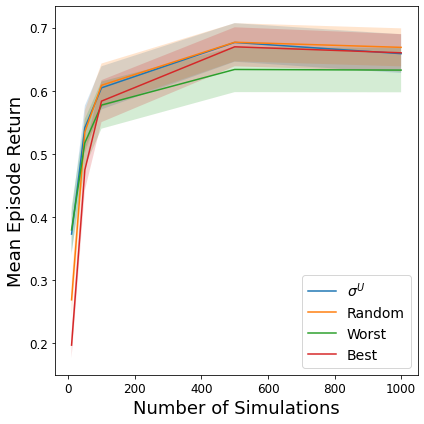

In [16]:
meta_vs_no_best_and_worst_pi_label_map = {
    f"baposgmcp_meta{best_meta}": best_meta_symbol,
    "baposgmcp-random": "Random",
    "baposgmcp-fixed_piheuristic1-v0": "Worst", 
    "baposgmcp-fixed_piheuristic2-v0": "Best",  # equal with H4 
    # "baposgmcp_fixed_piheuristic3-v0": "H3",
    # "baposgmcp_fixed_piheuristic4-v0": "H4"
}

plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "yticks": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    # "ylim": (0.15, 0.75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": "lower right",
    # "title": "Policy" 
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    meta_vs_no_meta_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_prefixes=[list(meta_vs_no_best_and_worst_pi_label_map)],
    pi_label_map=meta_vs_no_best_and_worst_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, f"meta_vs_fixed_return_best_and_worst.png"))
    
del plot_kwargs

## Comparing BAPOSGMCP versus baselines

Finally we compare BAPOSGMCP versus baselines. Specifically we compare:

- BAPOSGMCP (PUCB + Best Meta)
- IPOMCP-Meta (UCB + Best Meta)
- IPOMCP (UCB + Random)
- Meta

In [17]:
best_meta_pi = "uniform"
perf_df = exp_df[
    # (exp_df["alg_id"] == "full-knowledge-br")
    ((exp_df["alg_id"] == "metabaseline") & (exp_df["meta_pi"] == best_meta_pi))
    | ((exp_df["alg_id"] == "baposgmcp") & (exp_df["meta_pi"] == best_meta_pi) & (exp_df["truncated"] == False))
    | ((exp_df["alg_id"] == "baposgmcp-random") & (exp_df["truncated"] == False))
    | ((exp_df["alg_id"] == "ucbmcp") & (exp_df["meta_pi"] == best_meta_pi) & (exp_df["truncated"] == False))
    | ((exp_df["alg_id"] == "ucbmcp-random") & (exp_df["truncated"] == False))
]

baseline_policy_prefixes_to_plot = [
    f"baposgmcp_meta{best_meta_pi}",
    "baposgmcp-random",
    "ucbmcp-random",
    f"ucbmcp_meta{best_meta_pi}",
    f"metabaseline_{best_meta_pi}",
    # f"full-knowledge-br",
]

baseline_pi_label_map = {
    f"baposgmcp_meta{best_meta_pi}": algname,
    "baposgmcp-random": f"{algname} + Random", 
    f"metabaseline_{best_meta_pi}": "Meta-Policy",
    f"ucbmcp_meta{best_meta_pi}": f"{baselinealgname} + Meta",
    "ucbmcp-random": f"{baselinealgname} + Random"
}

perf_ids = perf_df["alg_id"].unique().tolist()
perf_ids.sort()
print("Alg IDs")
print("-------")
for n in perf_ids:
    print(n)
    
policy_ids = perf_df["policy_id"].unique().tolist()
policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in policy_ids:
    print(n)

Alg IDs
-------
baposgmcp
baposgmcp-random
metabaseline
ucbmcp
ucbmcp-random

Policy IDs
----------
baposgmcp-random_numsims1000_truncatedFalse
baposgmcp-random_numsims100_truncatedFalse
baposgmcp-random_numsims10_truncatedFalse
baposgmcp-random_numsims500_truncatedFalse
baposgmcp-random_numsims50_truncatedFalse
baposgmcp_metauniform_numsims1000_truncatedFalse
baposgmcp_metauniform_numsims100_truncatedFalse
baposgmcp_metauniform_numsims10_truncatedFalse
baposgmcp_metauniform_numsims500_truncatedFalse
baposgmcp_metauniform_numsims50_truncatedFalse
metabaseline_uniform
ucbmcp-random_numsims1000_truncatedFalse
ucbmcp-random_numsims100_truncatedFalse
ucbmcp-random_numsims10_truncatedFalse
ucbmcp-random_numsims500_truncatedFalse
ucbmcp-random_numsims50_truncatedFalse
ucbmcp_metauniform_numsims1000_truncatedFalse
ucbmcp_metauniform_numsims100_truncatedFalse
ucbmcp_metauniform_numsims10_truncatedFalse
ucbmcp_metauniform_numsims500_truncatedFalse
ucbmcp_metauniform_numsims50_truncatedFalse


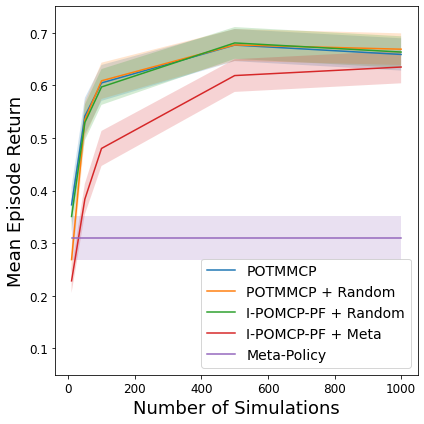

In [18]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "yticks": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    "ylim": (0.05, 0.75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": "lower right",
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    perf_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_prefixes=[baseline_policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, "baselines_return.png"))
    
del plot_kwargs

## Performance vs search time

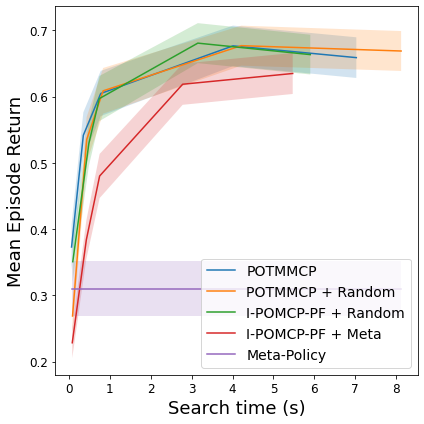

In [19]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "xlabel": "Search time (s)"
    # "ylim": (0.25, 2.3),
})
plot_kwargs["legend_kwargs"].update({
    "loc": "lower right",
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_search_time(
    perf_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_prefixes=[baseline_policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, "baselines_return_vs_search_time.png"))
    
del plot_kwargs

# Analysis

Here we take a deeper dive into the characteristics of BA-POSGMCP. Specifically looking at:

1. Belief accuracy
2. Planning time

## Looking at Belief accuracy by steps

- action_dist_distance
- bayes_accuracy

In [20]:
belief_df = exp_df[
    (exp_df["alg_id"] == "baposgmcp") 
    & (exp_df["truncated"] == False)
    & (exp_df["action_selection"] == "pucb")
]

# group over meta-policy values
belief_group_keys = ["alg_id", "num_sims"]
belief_agg_dict = plot_utils.get_uniform_expected_agg_map(exp_df)
for k in belief_group_keys:
    if k in belief_agg_dict:
        belief_agg_dict.pop(k)
        
gb = belief_df.groupby(belief_group_keys)
gb_agg = gb.agg(**belief_agg_dict)
belief_gb_df = gb_agg.reset_index()

belief_gb_df.sort_values(by=["alg_id", "num_sims"], inplace=True)

print("Ungrouped size =", len(belief_df))
print("Grouped size =", len(belief_gb_df))

belief_alg_ids = belief_df["alg_id"].unique().tolist()
belief_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in belief_alg_ids:
    print(n)
    
belief_policy_ids = belief_df["policy_id"].unique().tolist()
belief_policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in belief_policy_ids:
    print(n)

Ungrouped size = 15
Grouped size = 5
Alg IDs
-------
baposgmcp

Policy IDs
----------
baposgmcp_metagreedy_numsims1000_truncatedFalse
baposgmcp_metagreedy_numsims100_truncatedFalse
baposgmcp_metagreedy_numsims10_truncatedFalse
baposgmcp_metagreedy_numsims500_truncatedFalse
baposgmcp_metagreedy_numsims50_truncatedFalse
baposgmcp_metasoftmax_numsims1000_truncatedFalse
baposgmcp_metasoftmax_numsims100_truncatedFalse
baposgmcp_metasoftmax_numsims10_truncatedFalse
baposgmcp_metasoftmax_numsims500_truncatedFalse
baposgmcp_metasoftmax_numsims50_truncatedFalse
baposgmcp_metauniform_numsims1000_truncatedFalse
baposgmcp_metauniform_numsims100_truncatedFalse
baposgmcp_metauniform_numsims10_truncatedFalse
baposgmcp_metauniform_numsims500_truncatedFalse
baposgmcp_metauniform_numsims50_truncatedFalse


In [21]:
belief_plot_kwargs = copy.deepcopy(base_plot_kwargs)
belief_plot_kwargs["subplot_kwargs"].update({
    "xlabel": "Step",
})
belief_plot_kwargs["legend_kwargs"].update({
    "loc": "upper left",
    # "title": "Num. Sims." 
})

baposgmcp


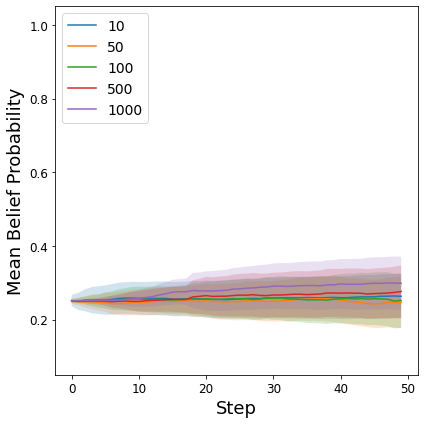

In [22]:
plot_kwargs = copy.deepcopy(belief_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Belief Probability",
    "ylim": (0.05, 1.05),
})

for alg_id in belief_alg_ids:
    print(alg_id)
    fig, _ = plot_utils.paper.plot_multiple_belief_stats(
        belief_gb_df[belief_gb_df["alg_id"] == alg_id],
        y_key_prefix="bayes_accuracy",
        step_limit=50,
        other_agent_id=1,
        y_suffix="mean",
        y_err_suffix="CI",
        alg_id_key="alg_id",
        **plot_kwargs
    )
    
    fig.tight_layout()
    fig.savefig(osp.join(figure_dir, f"bayes_accuracy_{alg_id}.png"))
    
del plot_kwargs

baposgmcp


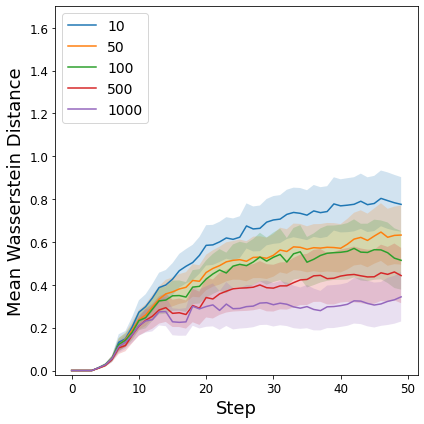

In [23]:
plot_kwargs = copy.deepcopy(belief_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean Wasserstein Distance",
    "ylim": (-0.02, 1.7),
})

belief_plot_kwargs["legend_kwargs"].update({
    "loc": "upper left",
})

for alg_id in belief_alg_ids:
    print(alg_id)
    fig, _ = plot_utils.paper.plot_multiple_belief_stats(
        belief_gb_df[belief_gb_df["alg_id"] == alg_id],
        y_key_prefix="action_dist_distance",
        step_limit=50,
        other_agent_id=1,
        y_suffix="mean",
        y_err_suffix="CI",
        alg_id_key="alg_id",
        **plot_kwargs
    )
    
    fig.tight_layout()
    fig.savefig(osp.join(figure_dir, f"action_dist_{alg_id}.png"))
    
del plot_kwargs

## Looking at time

   - search_time
   - update_time
   - reinvigoration_time
   - policy_calls
   - inference_time
   - search_depth

In [24]:
best_meta_pi = "uniform"
time_df = exp_df[
    ((exp_df["alg_id"] == "baposgmcp") & (exp_df["meta_pi"] == best_meta_pi) & (exp_df["truncated"] == False))
    | ((exp_df["alg_id"] == "ucbmcp") & (exp_df["meta_pi"] == best_meta_pi) & (exp_df["truncated"] == False))
    | ((exp_df["alg_id"] == "ucbmcp-random") & (exp_df["truncated"] == False))
]

policy_prefixes_to_plot = [
    f"baposgmcp_meta{best_meta_pi}",
    "ucbmcp-random",
    f"ucbmcp_meta{best_meta_pi}"
]

baseline_pi_label_map = {
    f"baposgmcp_meta{best_meta_pi}": "BAPOSGMCP",
    f"ucbmcp_meta{best_meta_pi}": f"{baselinealgname} + Meta",
    "ucbmcp-random": f"{baselinealgname} + Random"
}


times_alg_ids = time_df["alg_id"].unique().tolist()
times_alg_ids.sort()
print("Alg IDs")
print("-------")
for n in times_alg_ids:
    print(n)
    
times_policy_ids = time_df["policy_id"].unique().tolist()
times_policy_ids.sort()
print("\nPolicy IDs")
print("----------")
for n in times_policy_ids:
    print(n)

Alg IDs
-------
baposgmcp
ucbmcp
ucbmcp-random

Policy IDs
----------
baposgmcp_metauniform_numsims1000_truncatedFalse
baposgmcp_metauniform_numsims100_truncatedFalse
baposgmcp_metauniform_numsims10_truncatedFalse
baposgmcp_metauniform_numsims500_truncatedFalse
baposgmcp_metauniform_numsims50_truncatedFalse
ucbmcp-random_numsims1000_truncatedFalse
ucbmcp-random_numsims100_truncatedFalse
ucbmcp-random_numsims10_truncatedFalse
ucbmcp-random_numsims500_truncatedFalse
ucbmcp-random_numsims50_truncatedFalse
ucbmcp_metauniform_numsims1000_truncatedFalse
ucbmcp_metauniform_numsims100_truncatedFalse
ucbmcp_metauniform_numsims10_truncatedFalse
ucbmcp_metauniform_numsims500_truncatedFalse
ucbmcp_metauniform_numsims50_truncatedFalse


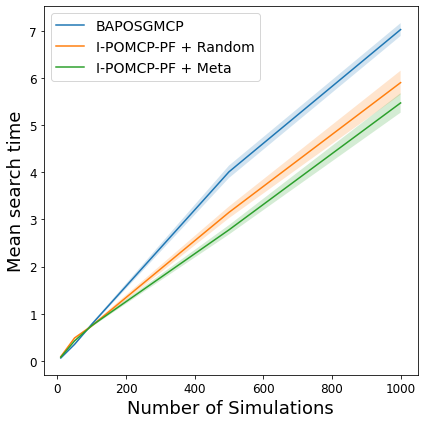

In [25]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean search time",
    # "ylim": (0, 75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    time_df,
    y_key="search_time_mean",
    y_err_key="search_time_CI",
    policy_prefixes=[policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, "search_time.png"))
    
del plot_kwargs

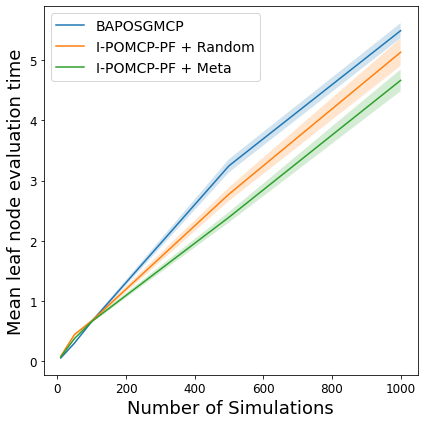

In [26]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean leaf node evaluation time",
    # "ylim": (0, 75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    time_df,
    y_key="evaluation_time_mean",
    y_err_key="evaluation_time_CI",
    policy_prefixes=[policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, "evaluation_time.png"))
    
del plot_kwargs

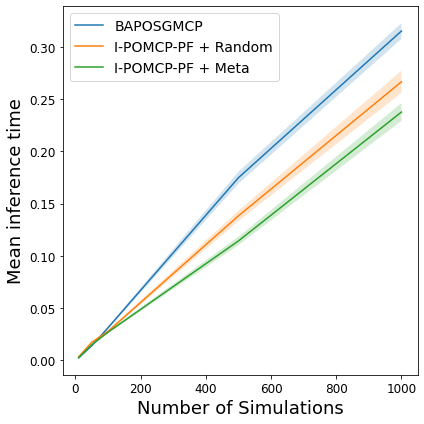

In [27]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean inference time",
    # "ylim": (0, 75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    time_df,
    y_key="inference_time_mean",
    y_err_key="inference_time_CI",
    policy_prefixes=[policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, "inference_time.png"))
    
del plot_kwargs

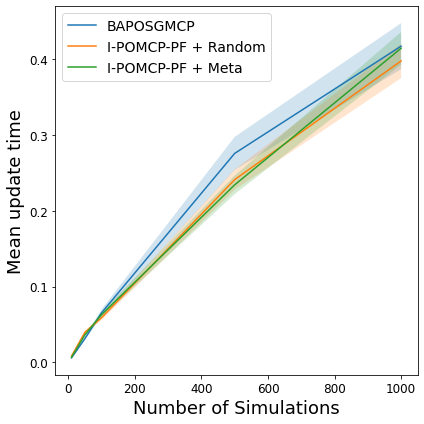

In [28]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean update time",
    # "ylim": (0, 75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    time_df,
    y_key="update_time_mean",
    y_err_key="update_time_CI",
    policy_prefixes=[policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, "update_time.png"))
    
del plot_kwargs

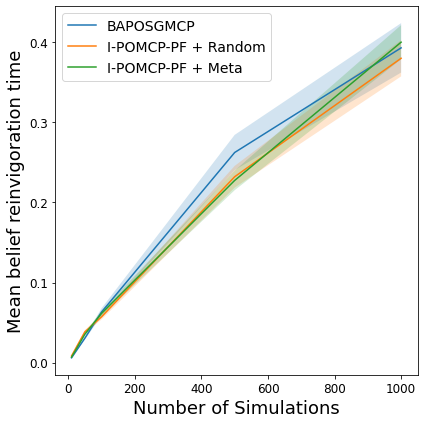

In [29]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean belief reinvigoration time",
    # "ylim": (0, 75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    time_df,
    y_key="reinvigoration_time_mean",
    y_err_key="reinvigoration_time_CI",
    policy_prefixes=[policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, "reinvigoration_time.png"))
    
del plot_kwargs

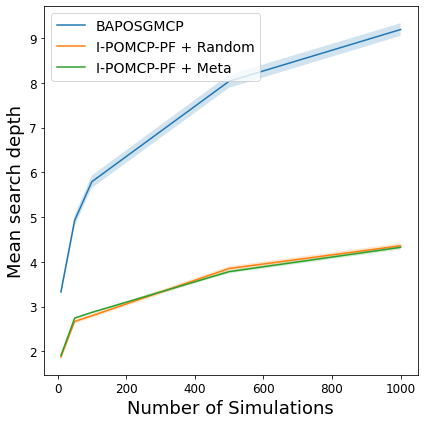

In [30]:
plot_kwargs = copy.deepcopy(return_plot_kwargs)
plot_kwargs["subplot_kwargs"].update({
    "ylabel": "Mean search depth",
    # "ylim": (0, 75),
})
plot_kwargs["legend_kwargs"].update({
    "loc": 'upper left',
})

fig, _ = plot_utils.paper.plot_multiple_performance_vs_num_sims(
    time_df,
    y_key="search_depth_mean",
    y_err_key="search_depth_CI",
    policy_prefixes=[policy_prefixes_to_plot],
    pi_label_map=baseline_pi_label_map,
    **plot_kwargs,
)

fig.tight_layout()
fig.savefig(osp.join(figure_dir, "search_depth.png"))
    
del plot_kwargs